# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.64e-20
Time:                        15:10:36   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg2 = smf.ols('tip ~ net_bill', data = tips).fit()
tips['res_log'] = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           5.02e-23
Time:                        15:11:47   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='res_log', ylabel='net_bill'>

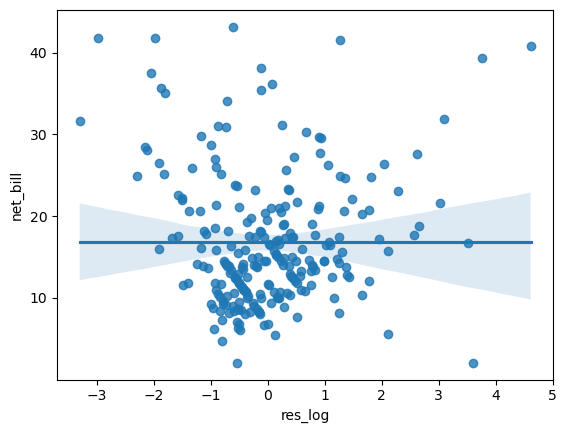

In [10]:
sns.regplot(x = 'res_log', y = 'net_bill', data = tips)

In [15]:
reg3 = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
tips['res_log'] = reg3.resid

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           4.96e-22
Time:                        15:16:56   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='res_log', ylabel='net_bill'>

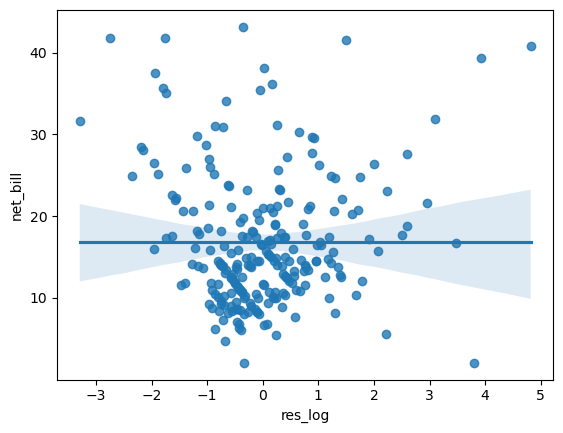

In [13]:
sns.regplot(x = 'res_log', y = 'net_bill', data = tips)

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [17]:
reg4 = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data = tips).fit()
tips['res_log'] = reg4.resid

reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.21e-18
Time:                        15:18:20   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
reg5 = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
tips['res_log'] = reg5.resid

reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.60e-21
Time:                        15:18:54   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='res_log', ylabel='net_bill'>

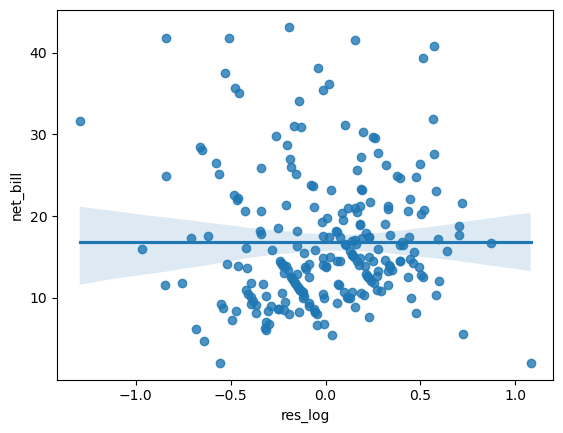

In [20]:
sns.regplot(x = 'res_log', y = 'net_bill', data = tips)

In [22]:
reg6 = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
tips['res_log'] = reg6.resid

reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.82e-22
Time:                        15:20:28   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
reg6.rsquared

0.3375243951608161

In [27]:
tips['pred_tip'] = np.exp(reg6.fittedvalues)

tips[['pred_tip', 'tip']].corr().iloc[0,1]**2

0.32908491114682004

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
prev = pd.read_csv('previsao_de_renda.csv')
prev.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [31]:
reg_prev = smf.ols('renda ~ tempo_emprego', data = prev).fit()
prev['resid'] = reg_prev.resid

reg_prev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:00:33   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

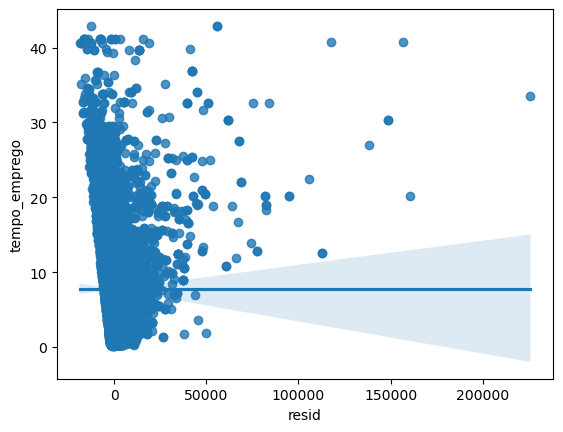

In [34]:
sns.regplot(x='resid', y='tempo_emprego', data=prev);

In [39]:
reg_prev = smf.ols('np.log(renda) ~ tempo_emprego + np.power(tempo_emprego, 2)', data = prev).fit()
prev['resid'] = reg_prev.resid

reg_prev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1312.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:06:04   Log-Likelihood:                -15125.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12424   BIC:                         3.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.7665      0.015    514.262      0.000       7.737       7.796
tempo_emprego                  0.0743      0.003     25.799      0.000       0.069       0.080
np.power(tempo_emprego, 2)    -0.0007   9.95e-05     -7.076      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       28.920   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.103
Skew:                           0.117   Prob(JB):                     4.79e-07
Kurtosis:                       2.961   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

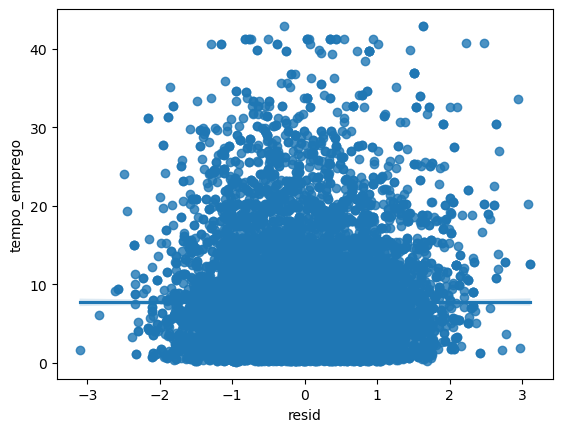

In [40]:
sns.regplot(x='resid', y='tempo_emprego', data=prev);

In [42]:
reg_prev2 = smf.ols('renda ~ tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = prev).fit()
prev['resid'] = reg_prev2.resid

reg_prev2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:11:00   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

In [73]:
reg_prev2 = smf.ols('np.log(renda) ~ np.power(tempo_emprego, 2) + tempo_emprego + sexo + posse_de_imovel + idade', data = prev).fit()
prev['resid'] = reg_prev2.resid

reg_prev2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     1327.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:22:32   Log-Likelihood:                -13657.
No. Observations:               12427   AIC:                         2.733e+04
Df Residuals:                   12421   BIC:                         2.737e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1963      0.033    218.154      0.000       7.132       7.261
sexo[T.M]                      0.7885      0.014     57.332      0.000       0.762       0.815
posse_de_imovel[T.True]        0.0911      0.014      6.622      0.000       0.064       0.118
np.power(tempo_emprego, 2)    -0.0007   8.87e-05     -7.507      0.000      -0.001      -0.000
tempo_emprego                  0.0787      0.003     30.660      0.000       0.074       0.084
idade                          0.0046      0.001      6.154      0.000       0.003       0.006
==============================================================================
Omnibus:                        1.646   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.644
Skew:                           0.028   Prob(JB):                        0.440
Kurtosis:                       3.000   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='resid', ylabel='tempo_emprego'>

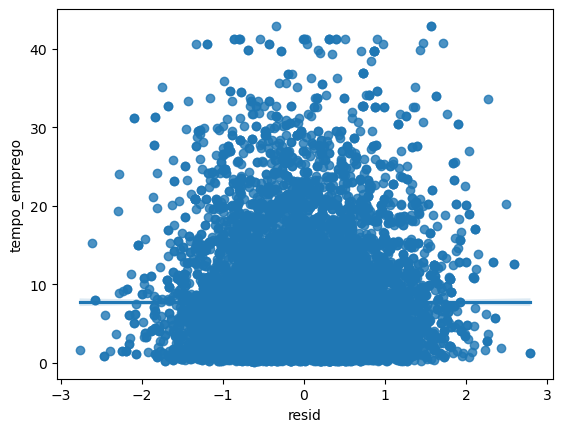

In [74]:
sns.regplot(x='resid', y='tempo_emprego', data=prev)


<Axes: xlabel='resid', ylabel='idade'>

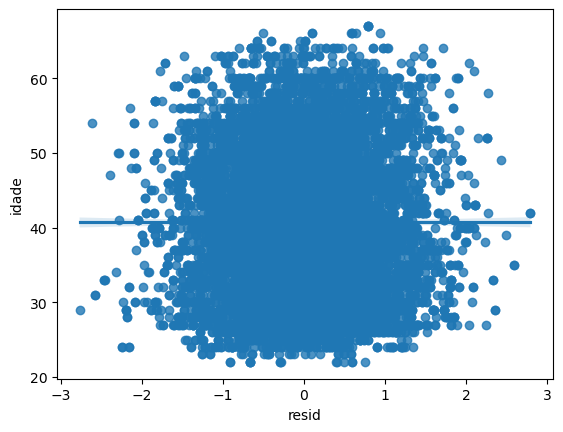

In [69]:
sns.regplot(x='resid', y='idade', data=prev)